In [1]:
from py2neo import Graph

In [2]:
graph = Graph("bolt://localhost:7687", password="123")

# Setup

In [3]:
# Delete All Nodes
q = '''
MATCH (n)
DETACH DELETE n
'''
graph.run(q)

In [7]:
#define the index - only run this when you create the graph
q = '''
CREATE CONSTRAINT ON (u:Account) ASSERT u.Name IS UNIQUE;
'''

#graph.run(q)

# Create Graph

In [4]:
greece = ["anastasiaant7",
"Annoubi",
"ANTILIPSI",
"Avelline_",
"Axeloukos",
"Banned_lRL",
"BazeGR",
"blackfiction87",
"bugaimerGR",
"ChaniaLiveTV",
"ChinnJ",
"ControllerByte",
"ConvictoZ",
"daenap",
"DaskaYT",
"DD_Warrior_Lady",
"Decpina_Nez",
"DezDyy",
"Dom1nant1337",
"DRAGOMANVR",
"elmagician18",
"f3els98",
"Fonikibekatsa",
"FORG1VENAPM",
"GRamers",
"gre_frost",
"GucciKitty",
"HackyPixelz",
"Hareas",
"hqcM",
"HungryPandaLOL",
"iliasgrGaming",
"imisslethal_hs",
"immortalgre1",
"im_thewolf1",
"iusedtobefamousbuthen",
"J0J0C69",
"johnmits",
"Jordaneiro",
"JOZO_Y",
"JustSsInTime",
"kemalyoxd",
"l0wprofile",
"L1l1th12",
"ldlc_comp",
"LegitGamingGR",
"LoLHellas",
"M_aDaR_A",
"MadNaab",
"MadneyYT",
"MaZzzZGR",
"mitsigas",
"MordeKillGR",
"n1kos_300",
"Nooblet9",
"Oldschool",
"PantezzzzZ",
"pao_logan",
"paotasos13",
"PGC_S1",
"Piperakos",
"poul_maniac",
"Pun1shers_TV",
"Santova_",
"shad0wst3ps",
"SkyFrostTube",
"SLaki",
"sofini1",
"SonOfZeus_TV",
"SophieSensei",
"sparks200iq",
"Ste4VeN",
"Team_Boo",
"theMachoDude",
"Tholwmenos",
"TL_Nero",
"Totyz",
"Tsili6969",
"vaal_blade",
"VroukoS",
"Wea91",
"Wikip3diotGames",
"YoMaMaTivi",
"RantingGreekGamer",
"This_Is_LilO"]

In [5]:
q = '''
LOAD CSV WITH HEADERS FROM "file:/{streamer_name}.csv" AS row
MERGE (user:Account {{Name:row.from_name}})
MERGE (streamer:Account {{Name:row.to_name}})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {{date:datetime(row.followed_at)}}]->(streamer);
'''


#s = '''
#    MATCH (s:Account{{Name:'{name}'}})
#    SET s:Streamer
#    '''

for streamer in greece: #streamers[0:2]:
    qq = q.format(streamer_name=streamer)
    print("Running query for: ",streamer)
    #print(qq)
    graph.run(qq)
    #ss = s.format(name=streamer)
    #graph.run(ss)


LOAD CSV WITH HEADERS FROM "file:/anastasiaant7.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {date:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH HEADERS FROM "file:/Annoubi.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {date:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH HEADERS FROM "file:/ANTILIPSI.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {date:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH HEADERS FROM "file:/Avelline_.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {date:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH


LOAD CSV WITH HEADERS FROM "file:/johnmits.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {date:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH HEADERS FROM "file:/Jordaneiro.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {date:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH HEADERS FROM "file:/JOZO_Y.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {date:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH HEADERS FROM "file:/JustSsInTime.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {date:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH H


LOAD CSV WITH HEADERS FROM "file:/Ste4VeN.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {date:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH HEADERS FROM "file:/Team_Boo.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {date:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH HEADERS FROM "file:/theMachoDude.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {date:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH HEADERS FROM "file:/Tholwmenos.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {date:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH 

## Count Nodes

In [6]:
x = graph.run('MATCH (n) RETURN count(n)')

In [7]:
x.data()

[{'count(n)': 336369}]

In [8]:
graph.run('MATCH (n:Streamer) RETURN count(n)').data()

[{'count(n)': 85}]

## Other Queries 

In [85]:
import pandas as pd
dates = pd.date_range('2013-01-01','2019-02-01', 
              freq='3M').strftime("%Y-%m-%d").tolist()
dates

['2013-01-31',
 '2013-04-30',
 '2013-07-31',
 '2013-10-31',
 '2014-01-31',
 '2014-04-30',
 '2014-07-31',
 '2014-10-31',
 '2015-01-31',
 '2015-04-30',
 '2015-07-31',
 '2015-10-31',
 '2016-01-31',
 '2016-04-30',
 '2016-07-31',
 '2016-10-31',
 '2017-01-31',
 '2017-04-30',
 '2017-07-31',
 '2017-10-31',
 '2018-01-31',
 '2018-04-30',
 '2018-07-31',
 '2018-10-31',
 '2019-01-31']

## Overlap

In [10]:
# create overlap counts with date
for date in dates:
    q = '''
    MATCH (s1:Streamer)<-[f1:Follows]-(f:Account)-[f2:Follows]->(s2:Streamer)
    WHERE (NOT f:Streamer) and (f1.date < datetime('{date}')) and (f2.date < datetime('{date}')) 
    WITH s1,s2,COUNT(f) AS followers
    MERGE (s1)-[a:agg]->(s2)
    ON MATCH SET a.f_{date_field} = followers
    '''

    qq = q.format(date=date,date_field=date.replace("-","_"))
    #print(qq)
    print("Running query for: ",date)
    graph.run(qq)

Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO
Running query for:  This_Is_LilO


In [12]:
# create overlap counts
q = '''
MATCH (s1:Streamer)<-[f1:Follows]-(f:Account)-[f2:Follows]->(s2:Streamer)
WHERE NOT f:Streamer
WITH s1,s2,count(f) as followers
CREATE (s1)-[a:agg{f_count:followers}]->(s2)
'''
#graph.run(q)

# count followers per node
q = '''
MATCH (a:Account)-[f:Follows]->(b:Account)
WITH b,count(f) as followers
SET b.followers = followers
'''
#graph.run(q)

## Followers per date

In [11]:
# follower per date
q = '''
    MATCH (a:Account)-[f:Follows]->(b:Account)
    WHERE (f.date < datetime('{date}'))  
    WITH b,COUNT(f) AS followers
    SET b.followers_{date_field} = followers
    '''
    
for date in dates:
    qq = q.format(date=date,date_field=date.replace("-","_"))
    #print(qq)
    print("Running query for: ", date)

    graph.run(qq)

Running query for:  2013-01-31
Running query for:  2013-04-30
Running query for:  2013-07-31
Running query for:  2013-10-31
Running query for:  2014-01-31
Running query for:  2014-04-30
Running query for:  2014-07-31
Running query for:  2014-10-31
Running query for:  2015-01-31
Running query for:  2015-04-30
Running query for:  2015-07-31
Running query for:  2015-10-31
Running query for:  2016-01-31
Running query for:  2016-04-30
Running query for:  2016-07-31
Running query for:  2016-10-31
Running query for:  2017-01-31
Running query for:  2017-04-30
Running query for:  2017-07-31
Running query for:  2017-10-31
Running query for:  2018-01-31
Running query for:  2018-04-30
Running query for:  2018-07-31
Running query for:  2018-10-31
Running query for:  2019-01-31


## Community Detection

In [96]:
# identify communities
q_community_detection = '''
CALL algo.louvain('MATCH (a:Account)-[f:Follows]->(b:Account) 
                    WHERE (f.date < datetime("{date}")) 
                    WITH DISTINCT collect(a)+collect(b) as n_list
                    UNWIND n_list as n
                    RETURN id(n) as id',
    'MATCH (a:Account)-[f:Follows]->(b:Account)
    WHERE (f.date < datetime("{date}"))  
    RETURN id(a) as source, id(b) as target',
  {{write:True, writeProperty:'community_{date_field}', graph:'Cypher'}})
YIELD nodes, communityCount, iterations, loadMillis, computeMillis, writeMillis;
'''

# get list of communities
q_communities = '''
MATCH (a:Streamer)
WHERE a.community_{old_date_field} > -1
RETURN DISTINCT a.community_{old_date_field} as Community
'''

# get streamer with higher centrality for that community
q_highest_dc = '''
    MATCH (a:Account)-[:Follows]->(s:Streamer)
    WHERE (a.community_{old_date_field} = {community}) AND (s.community_{old_date_field} = {community})
    WITH s,COUNT(a) as dc
    RETURN ID(s) as ID, dc as degree
    ORDER BY dc DESC
    LIMIT 1
    '''

# get all streamers in new group community 
q_streamer_groups = '''
    MATCH (a:Account)-[:Follows]->(s:Streamer)
    WHERE (a.community_{new_date_field} > -1) AND (s.community_{new_date_field} > -1)
    WITH DISTINCT s as ss
    RETURN DISTINCT ss.community_{new_date_field} AS Community, COLLECT(ID(ss)) as ID
    '''

# reasign new communities     
q_find = '''
    MATCH (s:Streamer)
    WHERE ID(s) = {node_id}
    RETURN s.community_{new_date_field} AS Community
    '''

q_set = '''
    MATCH (a:Account)
    WHERE a.community_{new_date_field} = {community_i1}
    SET a.community_{new_date_field} = {community_i0}
    '''

In [101]:
# identify communities
old_date = dates[0]
qq = q_community_detection\
            .format(date=old_date,date_field=old_date.replace("-","_"))
graph.run(qq)

for date in dates[1:3]:
    print("\nCommunity Detectiont for:",date)
    print("Previouse Date:", old_date)
    old_date_field = old_date.replace("-","_")
    
    
    # get list of communities
    qq = q_communities.format(old_date_field=old_date_field)
    data = graph.run(qq).data()
    
    communities_i0 = []
    for i in data:
        communities_i0.append(i.get("Community"))

    print("old communities", communities_i0)

    # get streamer with higher centrality for that community
    d = {}
    dc_streamers = []
    for community in communities_i0:
        qq = q_highest_dc.format(community=community,
                                 old_date_field=old_date_field)
        data = graph.run(qq).data()

        s_id = data[0].get("ID")
        degree = data[0].get("degree")
        dc_streamers += [s_id]
        d[s_id] = {"degree":degree,"community":community}

    print("Old Community Centers",d)
        
    # identify communities
    print("Identifying Communities")
    new_date_field = date.replace("-","_")
    qq = q_community_detection\
                .format(date=date,date_field=new_date_field)
    graph.run(qq)

    # change new community number if there is overlap
    #todo
    
    # get all streamers in new group community 
    qq = q_streamer_groups.format(new_date_field=new_date_field)
    community_nodes = graph.run(qq).data()

    print("Finding Overlap of New and Old Communities")
    merge_communities = []
    for i in community_nodes:
        community = i.get("Community")
        ids = set(i.get("ID"))
        intersection = ids.intersection(set(dc_streamers))
        if len(intersection) > 1:
            merge_communities += [intersection]

    #resolve merge conflict
    #todo
    
    # reasign new communities     
    print("Reasiging Communities")
    for k,v in d.items():
        community_i0 = v.get("community")
        qq = q_find.format(node_id=str(k),new_date_field=new_date_field)
        community_i1 = graph.run(qq).data()[0].get("Community")
        
        print("ID",k,"old c:",community_i0,"New c:",community_i1)
        
        qq = q_set.format(community_i1=community_i1,
                          community_i0=community_i0,
                             new_date_field=new_date_field)

        graph.run(qq)
        
    old_date = date


Community Detectiont for: 2013-04-30
Previouse Date: 2013-01-31
old communities [4, 1, 2, 0]
Old Community Centers {310660: {'degree': 2, 'community': 4}, 315086: {'degree': 153, 'community': 1}, 328913: {'degree': 2, 'community': 2}, 334845: {'degree': 3, 'community': 0}}
Identifying Communities
Finding Overlap of New and Old Communities
Reasiging Communities
ID 310660 old c: 4 New c: 6

    MATCH (a:Account)
    WHERE a.community_2013_04_30 = 6
    SET a.community_2013_04_30 = 4
    
ID 315086 old c: 1 New c: 1

    MATCH (a:Account)
    WHERE a.community_2013_04_30 = 1
    SET a.community_2013_04_30 = 1
    
ID 328913 old c: 2 New c: 3

    MATCH (a:Account)
    WHERE a.community_2013_04_30 = 3
    SET a.community_2013_04_30 = 2
    
ID 334845 old c: 0 New c: 0

    MATCH (a:Account)
    WHERE a.community_2013_04_30 = 0
    SET a.community_2013_04_30 = 0
    

Community Detectiont for: 2013-07-31
Previouse Date: 2013-04-30
old communities [4, 1, 2, 0]
Old Community Centers {310660:

In [ ]:
# get views between two streamers
'''
MATCH (s1:Streamer{Name:'SonOfZeus_TV'})<-[:Follows]-(a:Account)-[:Follows]->(s2:Streamer{Name:'Fonikibekatsa'})
WHERE NOT a:Streamer
RETURN s1,s2,a
LIMIT 50;
'''

In [7]:
# export graph
#CALL apoc.export.graphml.all('/tmp/complete-graph.graphml', {useTypes:true, storeNodeIds:false})

q = '''
CALL apoc.export.graphml.query('MATCH (s1:Streamer)-[a:agg]->(s2:Streamer) RETURN s1,a','/Users/jeroen/Downloads/graph_communities_2.graphml',{useTypes:true, storeNodeIds:false})
'''
graph.run(q)

In [29]:
! pwd

/Users/jeroen/repos/twitch-graph-analysis/Notebooks


## Testing Networkx

In [21]:
x = '''
MATCH (s:Streamer)-[a:agg]->(s2:Streamer)
RETURN s,s2,a
'''

xx = graph.run(x).data()

In [22]:
xx[1]

{'s': (:Account:Streamer {Name: 'Oldschool'}),
 's2': (:Account:Streamer {Name: 'Piperakos'}),
 'a': ()-[:agg {counts: 4868}]->()}

In [23]:
r = 

In [127]:
import networkx as nx
import nxviz as nv
from matplotlib import pyplot as plt
G=nx.Graph()

In [185]:
for xxx in xx:
    name1 = list(xxx.get('s').items())[0][1]
    name2 = list(xxx.get('s2').items())[0][1]
    edge_count = list(xxx.get('a').items())[0][1]    
    G.add_node(name1)
    G.add_node(name2)
    G.add_edge(name1,name2,followers=edge_count)

In [186]:
streamers = ['Oldschool',
  'HackyPixelz',
  'DD_Warrior_Lady',
  'Piperakos',
  'SonOfZeus_TV',
  'Fonikibekatsa',
  'BazeGR',
  'Axeloukos',
  'ControllerByte']

matrix = nx.attr_matrix(G, edge_attr='followers', normalized=True)

for i in range(0,matrix[0].shape[0]):
    for ii in range(0,matrix[0].shape[0]):
        if i != ii:
            n1 = streamers[i]
            n2 = streamers[ii]
            G[n1][n2]["followers"] = matrix[0][i,ii]*10

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 0
1 2
1 3
1 4
1 5
1 6
1 7
1 8
2 0
2 1
2 3
2 4
2 5
2 6
2 7
2 8
3 0
3 1
3 2
3 4
3 5
3 6
3 7
3 8
4 0
4 1
4 2
4 3
4 5
4 6
4 7
4 8
5 0
5 1
5 2
5 3
5 4
5 6
5 7
5 8
6 0
6 1
6 2
6 3
6 4
6 5
6 7
6 8
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 8
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7


In [176]:
matrix[0][0,1]

0.13493150684931507

In [194]:
G.edges(data=True)

EdgeDataView([('SonOfZeus_TV', 'Piperakos', {'followers': 1.4876985800646703}), ('SonOfZeus_TV', 'DD_Warrior_Lady', {'followers': 2.143399409531843}), ('SonOfZeus_TV', 'Fonikibekatsa', {'followers': 1.8768586104352527}), ('SonOfZeus_TV', 'BazeGR', {'followers': 0.3284508375627843}), ('SonOfZeus_TV', 'Oldschool', {'followers': 1.1654716715872346}), ('SonOfZeus_TV', 'ControllerByte', {'followers': 1.536814030550392}), ('SonOfZeus_TV', 'HackyPixelz', {'followers': 0.4240123717137635}), ('SonOfZeus_TV', 'Axeloukos', {'followers': 0.6763077153333832}), ('Piperakos', 'Oldschool', {'followers': 1.4535248275656145}), ('Piperakos', 'HackyPixelz', {'followers': 0.44310411752411094}), ('Piperakos', 'Axeloukos', {'followers': 0.5595674623961686}), ('Piperakos', 'Fonikibekatsa', {'followers': 1.3994773362169957}), ('Piperakos', 'ControllerByte', {'followers': 0.8789299280691829}), ('Piperakos', 'BazeGR', {'followers': 0.3465958397980382}), ('Piperakos', 'DD_Warrior_Lady', {'followers': 2.7326744498

/Users/jeroen/anaconda3/envs/bigdata/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


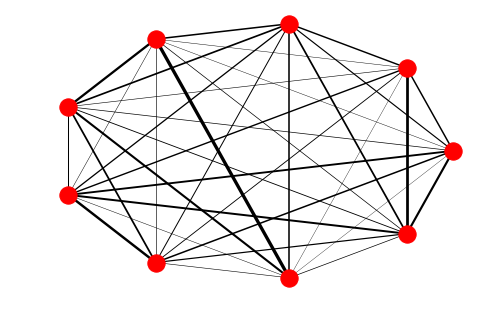

In [201]:
%matplotlib inline

pos = nx.circular_layout(G)
edges = G.edges()
weights = [G[u][v]['followers'] for u,v in edges]
nx.draw(G, pos, edges=edges, width=weights)

In [112]:
c.edge_width

'followers'

In [6]:
xx = list(r.items())[0][1]

In [15]:
G.add_node("a")

In [17]:
G.nodes()

NodeView(('a',))

## Get Files

In [8]:
import pandas as pd
x = "/Users/jeroen/Library/Application Support/Neo4j Desktop/Application/neo4jDatabases/database-cd15ba45-6933-46a1-bd36-b9fcd973a1a8/installation-3.5.3/import/This_Is_LilO.csv"
df = pd.read_csv(x)

In [20]:
pd.unique(df.from_name).shape

(13447,)

In [21]:
df.shape

(23347, 5)

# Format XML

In [1]:
for n in root.findall(".{http://www.gexf.net/1.3}graph/{http://www.gexf.net/1.3}edges/{http://www.gexf.net/1.3}edge/{http://www.gexf.net/1.3}attvalues/")[0:2]:
    x = n.attrib
    print(n.attrib)

NameError: name 'root' is not defined

In [130]:
#doc = etree.parse("/Users/jeroen/Downloads/graphs/overlap_aggs.gexf")
#etree.ElementTree(doc.getroot()).write("/Users/jeroen/Downloads/graphs/overlap_aggs_test.gexf",
#                                       encoding="UTF-8",
#                                       xml_declaration=True)

In [ ]:
tree.write()

In [160]:
#tree = etree.parse('/Users/jeroen/Downloads/overlap_aggs.gexf')
#tree.write("/Users/jeroen/Downloads/overlap_aggs_test.gexf",
#           with_tail=True,encoding="UTF-8",xml_declaration=True,method="html")

In [8]:
date_d = {}
ii = 1
for i in dates:
    date_d[i] = ii
    ii +=1
    
date_d

{'2013-01-31': 1,
 '2013-04-30': 2,
 '2013-07-31': 3,
 '2013-10-31': 4,
 '2014-01-31': 5,
 '2014-04-30': 6,
 '2014-07-31': 7,
 '2014-10-31': 8,
 '2015-01-31': 9,
 '2015-04-30': 10,
 '2015-07-31': 11,
 '2015-10-31': 12,
 '2016-01-31': 13,
 '2016-04-30': 14,
 '2016-07-31': 15,
 '2016-10-31': 16,
 '2017-01-31': 17,
 '2017-04-30': 18,
 '2017-07-31': 19,
 '2017-10-31': 20,
 '2018-01-31': 21,
 '2018-04-30': 22,
 '2018-07-31': 23,
 '2018-10-31': 24,
 '2019-01-31': 25}

In [12]:
xpath = ".{http://www.gexf.net/1.3}graph/{http://www.gexf.net/1.3}edges/{http://www.gexf.net/1.3}edge/{http://www.gexf.net/1.3}attvalues/"


In [13]:
from lxml import etree
tree = etree.parse('/Users/jeroen/Downloads/graph_communities_2.gexf')
root = tree.getroot()

for n in root.findall(xpath):
    d = n.attrib
    date = d["for"]
    date_formated = date.replace('f_','').replace("_","-")
    d["for"] = "weight"
    d["timestamp"] = str(date_d.get(date_formated))

In [14]:
xpath = ".{http://www.gexf.net/1.3}graph/{http://www.gexf.net/1.3}nodes/"
xpath2 = "{http://www.gexf.net/1.3}attvalues/" 

In [15]:
for node in root.findall(xpath):
    min_time = 100000000000
    time_changed = False
    for attrib in node.findall(xpath2):
        d = attrib.attrib
        label = d["for"]

        if label.find("followers_") != -1:
                date = label
                date_formated = date.replace('followers_','').replace("_","-")
                d["for"] = "followers"
                time = date_d.get(date_formated)
                d["timestamp"] = str(time)

                if min_time > time:
                    time_changed = True
                    min_time = time

        if label.find("community_") != -1:
                date = label
                date_formated = date.replace('community_','').replace("_","-")
                d["for"] = "community"
                d["timestamp"] = str(date_d.get(date_formated))

        print(d)
    
    if time_changed:
        node.append(etree.Element("spells"))
        spells = node.xpath("spells")[0]

        end = len(date_d)
        for i in range(min_time,end+1):
            spells.append(etree.Element("spell",attrib={"timestamp":str(i)}))

{'for': 'followers', 'value': '2', 'timestamp': '14'}
{'for': 'community', 'value': '2908', 'timestamp': '14'}
{'for': 'community', 'value': '2183', 'timestamp': '19'}
{'for': 'followers', 'value': '7', 'timestamp': '19'}
{'for': 'name', 'value': 'iliasgrGaming'}
{'for': 'followers', 'value': '1', 'timestamp': '4'}
{'for': 'followers', 'value': '252', 'timestamp': '25'}
{'for': 'community', 'value': '3', 'timestamp': '21'}
{'for': 'community', 'value': '7037', 'timestamp': '9'}
{'for': 'followers', 'value': '1', 'timestamp': '7'}
{'for': 'followers', 'value': '2', 'timestamp': '16'}
{'for': 'followers', 'value': '2', 'timestamp': '15'}
{'for': 'community', 'value': '2741', 'timestamp': '13'}
{'for': 'followers', 'value': '186', 'timestamp': '21'}
{'for': 'community', 'value': '2814', 'timestamp': '7'}
{'for': 'community', 'value': '2651', 'timestamp': '12'}
{'for': 'followers', 'value': '2', 'timestamp': '18'}
{'for': 'followers', 'value': '1', 'timestamp': '6'}
{'for': 'community', 'v

{'for': 'name', 'value': 'DaskaYT'}
{'for': 'followers', 'value': '2792', 'timestamp': '25'}
{'for': 'community', 'value': '0', 'timestamp': '24'}
{'for': 'community', 'value': '0', 'timestamp': '25'}
{'for': 'community', 'value': '2', 'timestamp': '23'}
{'for': 'followers', 'value': '2439', 'timestamp': '24'}
{'for': 'followers', 'value': '263', 'timestamp': '23'}
{'for': 'followers', 'value': '3', 'timestamp': '14'}
{'for': 'community', 'value': '3061', 'timestamp': '14'}
{'for': 'community', 'value': '86', 'timestamp': '3'}
{'for': 'community', 'value': '4198', 'timestamp': '19'}
{'for': 'followers', 'value': '44', 'timestamp': '19'}
{'for': 'name', 'value': 'M_aDaR_A'}
{'for': 'followers', 'value': '3', 'timestamp': '2'}
{'for': 'followers', 'value': '3', 'timestamp': '4'}
{'for': 'followers', 'value': '12165', 'timestamp': '25'}
{'for': 'community', 'value': '0', 'timestamp': '21'}
{'for': 'community', 'value': '2042', 'timestamp': '9'}
{'for': 'followers', 'value': '3', 'timestam

{'for': 'community', 'value': '24', 'timestamp': '25'}
{'for': 'followers', 'value': '1739', 'timestamp': '17'}
{'for': 'community', 'value': '2', 'timestamp': '17'}
{'for': 'community', 'value': '4', 'timestamp': '20'}
{'for': 'community', 'value': '19', 'timestamp': '23'}
{'for': 'followers', 'value': '2539', 'timestamp': '24'}
{'for': 'followers', 'value': '2282', 'timestamp': '22'}
{'for': 'community', 'value': '3', 'timestamp': '15'}
{'for': 'community', 'value': '5', 'timestamp': '18'}
{'for': 'followers', 'value': '2464', 'timestamp': '23'}
{'for': 'community', 'value': '0', 'timestamp': '16'}
{'for': 'followers', 'value': '5800', 'timestamp': '14'}
{'for': 'community', 'value': '2', 'timestamp': '14'}
{'for': 'community', 'value': '0', 'timestamp': '3'}
{'for': 'community', 'value': '3', 'timestamp': '19'}
{'for': 'followers', 'value': '7145', 'timestamp': '19'}
{'for': 'name', 'value': 'Team_Boo'}
{'for': 'followers', 'value': '1103', 'timestamp': '4'}
{'for': 'followers', 'va

In [16]:
tree.write("/Users/jeroen/Downloads/graph_community_dynamic_test2.gexf",
           with_tail=True,encoding="UTF-8",xml_declaration=True,method="html")

## Messing Around

In [2]:
from lxml import etree
tree = etree.parse('/Users/jeroen/Downloads/graph_communities.gexf')
root = tree.getroot()

In [25]:
xpath = ".{http://www.gexf.net/1.3}graph/{http://www.gexf.net/1.3}nodes/"


In [ ]:
<spells>
          <spell timestamp="2004.0"></spell>
          <spell timestamp="2007.0"></spell>
          <spell timestamp="2008.0"></spell>
          <spell timestamp="2009.0"></spell>
          <spell timestamp="2011.0"></spell>
          <spell timestamp="2013.0"></spell>
</spells>

In [31]:
for n in root.findall(xpath)[0:3]:
    print(n.attrib)

{'id': 'n65875', 'label': 'n65875'}
{'id': 'n82922', 'label': 'n82922'}
{'id': 'n162429', 'label': 'n162429'}


In [32]:
end = len(date_d)

n.append(etree.Element("spells"))
nn = n.xpath("spells")[0]

for i in range(start,end+1)
    nn.append(etree.Element("spell",attrib={"timestamp":str(i)}))

In [56]:
for i in range(0,5):
    print(i)

0
1
2
3
4


In [55]:
for nn in n:
    print(nn)

<Element {http://www.gexf.net/1.3}attvalues at 0x10bc6c608>
<Element {http://www.gexf.net/1.3/viz}size at 0x10bc7f208>
<Element {http://www.gexf.net/1.3/viz}position at 0x10bc7f0c8>
<Element {http://www.gexf.net/1.3/viz}color at 0x10bc6c608>
<Element spells at 0x10bc47cc8>


In [92]:
etree.dump(node)

<node xmlns="http://www.gexf.net/1.3" xmlns:viz="http://www.gexf.net/1.3/viz" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" id="n337088" label="n337088">
        <attvalues>
          <attvalue for="community" value="260925" timestamp="14"/>
          <attvalue for="community" value="333825" timestamp="3"/>
          <attvalue for="community" value="154823" timestamp="19"/>
          <attvalue for="name" value="theMachoDude"/>
          <attvalue for="followers" value="359" timestamp="25"/>
          <attvalue for="community" value="10333" timestamp="21"/>
          <attvalue for="community" value="304493" timestamp="9"/>
          <attvalue for="community" value="268674" timestamp="13"/>
          <attvalue for="followers" value="1" timestamp="21"/>
          <attvalue for="community" value="319488" timestamp="7"/>
          <attvalue for="community" value="275925" timestamp="12"/>
          <attvalue for="community" value="0" timestamp="24"/>
          <attvalue for="communit

In [51]:
tree.write("/Users/jeroen/Downloads/test.gexf",
           with_tail=True,encoding="UTF-8",xml_declaration=True,method="html")

In [204]:
tree = ET.parse('/Users/jeroen/Downloads/overlap_aggs_test5.gexf')
root = tree.getroot()

for n in root.findall(".{http://www.gexf.net/1.3}graph/{http://www.gexf.net/1.3}edges/{http://www.gexf.net/1.3}edge/{http://www.gexf.net/1.3}attvalues/"):
    print(n.attrib)

{'for': 'follow_overlap', 'value': '879', 'timestamp': '6'}
{'for': 'follow_overlap', 'value': '1489', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '1572', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '1246', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '1080', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '1722', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '1781', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '340', 'timestamp': '5'}
{'for': 'follow_overlap', 'value': '1665', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '113', 'timestamp': '4'}
{'for': 'follow_overlap', 'value': '12', 'timestamp': '3'}
{'for': 'follow_overlap', 'value': '5527', 'timestamp': '6'}
{'for': 'follow_overlap', 'value': '9800', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '10647', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '8865', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '7193', 'timestamp': '7'}
{'for': 'follow_overlap

{'for': 'follow_overlap', 'value': '1840', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '387', 'timestamp': '5'}
{'for': 'follow_overlap', 'value': '1497', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '43', 'timestamp': '6'}
{'for': 'follow_overlap', 'value': '119', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '156', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '93', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '61', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '359', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '407', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '29', 'timestamp': '5'}
{'for': 'follow_overlap', 'value': '252', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '225', 'timestamp': '6'}
{'for': 'follow_overlap', 'value': '447', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '543', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '387', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': 

{'for': 'follow_overlap', 'value': '171', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '3', 'timestamp': '6'}
{'for': 'follow_overlap', 'value': '310', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '543', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '5', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '4', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '762', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '834', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '687', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '6'}
{'for': 'follow_overlap', 'value': '211', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '229', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '165', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '43', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '248', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '251', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '235',

{'for': 'follow_overlap', 'value': '6', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '328', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '1205', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '241', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '4', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '5', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '37', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '406', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '32', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '84', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '251', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '32', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '403', 'timest

{'for': 'follow_overlap', 'value': '671', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '349', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '427', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '607', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '24', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '866', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '2369', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '722', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '673', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '960', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '34', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '1452', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '2819', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1095', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '351', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '496', 'timestamp': '10'}
{'for': 'follow_overlap', '

{'for': 'follow_overlap', 'value': '2', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '7', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '9', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '11', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '8', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '241', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '443', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '700', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '1216', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '538', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '24', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '39', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '44', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '92', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '41', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '101', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '312',

{'for': 'follow_overlap', 'value': '185', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '13', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '15', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '29', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '60', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '23', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '288', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '1347', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '1413', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1017', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '3', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '3', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '695', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '1128', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '4', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '

{'for': 'follow_overlap', 'value': '355', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '438', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '284', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '5', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '5', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '6', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '5', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '47', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '495', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '572', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '320', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '9', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '120', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '123', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '92', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '20', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '4

{'for': 'follow_overlap', 'value': '7', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '25', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '30', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '15', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '59', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '2220', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '3928', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '952', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '618', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '740', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '307', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '276', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '2890', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '3611', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1715', 'timestamp': '11'}
{'for': 'follow_overlap', '

{'for': 'follow_overlap', 'value': '6', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '7', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '9', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '7', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '24', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '28', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '28', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '27', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '160', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '130', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '1', 'timesta

{'for': 'follow_overlap', 'value': '5025', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '6204', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '3052', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '2657', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '3175', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1799', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '1313', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '2205', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1221', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '3061', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '4757', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1054', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '2277', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '3405', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1264', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '1881', 'timestamp': '12'}
{'for': 

{'for': 'follow_overlap', 'value': '23', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '114', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '130', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '524', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '777', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '92', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '111', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '9', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '11', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '23', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '76', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '9', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '11', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '692', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '18

{'for': 'follow_overlap', 'value': '1409', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '26', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '98', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '692', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '1831', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '7', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '12', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '17', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '26', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '25', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '43', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '12', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '19', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '15', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '19', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '36', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '

{'for': 'follow_overlap', 'value': '27', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '24', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '185', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '3', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '13', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '165', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '84', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '3', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '5', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '39', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '18', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '19', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '654', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '54', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '450', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '477', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '21

{'for': 'follow_overlap', 'value': '129', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '43', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '73', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '18', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '15', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '13', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '19', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '46', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '41', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '23', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1263', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1009', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1041', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '749', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '141', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '516', 'timestamp': '13'}
{'for': 'follow_overlap', 'val

In [94]:
t = {"test":123}

In [88]:
x

{'for': 'f_2019_03_01', 'value': '1'}

In [50]:
for n in root.iter():
    print(n.tag)


{http://www.gexf.net/1.3}gexf
{http://www.gexf.net/1.3}meta
{http://www.gexf.net/1.3}creator
{http://www.gexf.net/1.3}description
{http://www.gexf.net/1.3}graph
{http://www.gexf.net/1.3}attributes
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attributes
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}nodes
{http://www.gexf.net/1.3}node
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3/viz}size
{http://www.gexf.net/1.3/viz}position
{http://www.gexf.net/1.3}node
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3/viz}size
{http://www.gexf.net/1.3/viz}position
{http://www.gexf.net/1.3}node
{http://www.ge

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.ne

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}at

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}a

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}e

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attv

{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{htt

{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://ww

In [47]:
for elem in root.iter("{http://www.gexf.net/1.3}edge"):
    for n in elem:
        print(n.tag, n.attrib)


{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.

{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.

{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.

{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.

{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.

In [ ]:
roo